<a href="https://colab.research.google.com/github/luishpinto/astrophysics/blob/main/orbital_mechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
from scipy.constants import G, year, au
from astropy.constants import M_sun

import matplotlib.pyplot as plt

In [56]:
M1 = 2.06 * M_sun.value
M2 = 1.02 * M_sun.value

In [57]:
a = 2.64 * 7.4957 * au
e = 0.5914

In [58]:
T = 2 * np.pi * (G * (M1 + M2))**(-1/2) * a**(3/2)
print('Orbital period = {:.1f} yr'.format(T / year))

Orbital period = 50.2 yr


In [60]:
n_rev = 10
n = n_rev * 1000
dt = n_rev * T / n
t = np.arange(0, (n + 1) * dt, dt)

In [61]:
x1, y1 = np.zeros(n + 1), np.zeros(n + 1)
x2, y2 = np.zeros(n + 1), np.zeros(n + 1)
vx1, vy1 = np.zeros(n + 1), np.zeros(n + 1)
vx2, vy2 = np.zeros(n + 1), np.zeros(n + 1)

In [62]:
d = a * (1 + e)
v = np.sqrt(G * (M1 + M2) * (2 / d - 1 / a))

x1[0], y1[0] = d * M2 / (M1 + M2), 0.0
x2[0], y2[0] = -d * M1 / (M1 + M2), 0.0

vx1[0], vy1[0] = 0.0, -v * M2 / (M1 + M2)
vx2[0], vy2[0] = 0.0, v * M1 / (M1 + M2)

In [63]:
alpha = G * M1 * M2

for i in range(n):
  dx = x2[i] - x1[i]
  dy = y2[i] - y1[i]

  d3 = (dx**2 + dy**2)**(3 / 2)

  Fx = alpha * dx / d3
  Fy = alpha * dy / d3

  vx1[i + 1] = vx1[i] + Fx * dt / M1
  vy1[i + 1] = vy1[i] + Fy * dt / M1
  vx2[i + 1] = vx2[i] - Fx * dt / M2
  vy2[i + 1] = vy2[i] - Fy * dt / M2

  x1[i + 1] = x1[i] + vx1[i] * dt
  y1[i + 1] = y1[i] + vy1[i] * dt
  x2[i + 1] = x2[i] + vx2[i] * dt
  y2[i + 1] = y2[i] + vy2[i] * dt

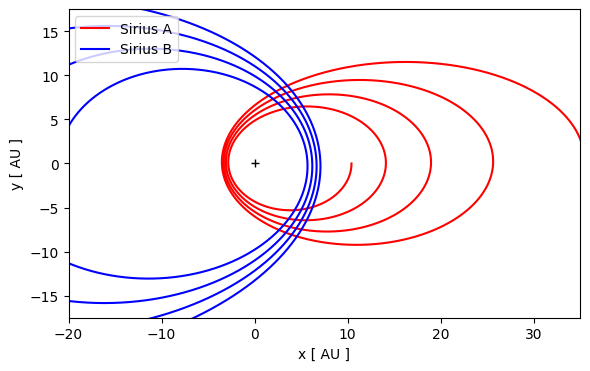

In [64]:
fig = plt.figure(figsize = (6.0, 6 * 35 / 55), dpi = 100)
plt.plot([0], [0], '+k')
plt.plot(x1 / au, y1 / au, color = 'red', label = 'Sirius A')
plt.plot(x2 / au, y2 / au, color = 'blue', label = 'Sirius B')
plt.xlabel('x [ AU ]')
plt.ylabel('y [ AU ]')
plt.xlim(-20.0, 35.0)
plt.ylim(-17.5, 17.5)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()